## 傅立葉轉換  把照片(波) 轉換成 頻率來看
- 一個波可以拆成很多sin跟cos看，所以不用看波 看頻率

### 1.用numpy做傅立葉轉換

[[ 4616.           +0.j          2893.70972122-2304.4162821j
    155.82983686-1252.09606675j ...  1128.22777832+2814.00026795j
    155.82983686+1252.09606675j  2893.70972122+2304.4162821j ]
 [ -572.71103194-1069.37648978j  -384.02322165 +584.397759j
   -665.70616464 -349.62928982j ... -1180.57007405 -115.93376812j
   1528.10148515 +332.67729915j   642.38887757 -843.88503169j]
 [-1578.1042575 +1792.91266588j -1176.79437694+2103.66883519j
   1268.930298   -134.73750505j ... -2219.13848285 +408.59304127j
   1498.33855788 +899.6062537j   -103.12085301-1543.94136195j]
 ...
 [-1993.96096492 -863.08723221j   920.17411204 -826.14251241j
    625.12347762-1923.63907135j ... -1036.7208929  +563.60795386j
    107.49456502-1915.35717802j   324.79345025 -326.00350711j]
 [-1578.1042575 -1792.91266588j  -103.12085301+1543.94136195j
   1498.33855788 -899.6062537j  ... -2280.7114216  +650.41715443j
   1268.930298   +134.73750505j -1176.79437694-2103.66883519j]
 [ -572.71103194+1069.37648978j   642.38887

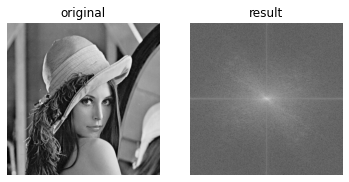

In [2]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/lena.bmp',0)

# fft是 fast fourier transform縮寫
f = np.fft.fft2(img)  #把照片做傅立葉轉換
fshift = np.fft.fftshift(f) # 把頻譜 最亮的地方移動中間
print(fshift)

magnitude_spectrum = 20*np.log(np.abs(fshift)) #(計算大小) np.abs取絕對值 /np.log 取log

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('original')
plt.axis('off')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray') #傅立葉轉換後的樣子
plt.title('result') 
plt.axis('off')

plt.show()

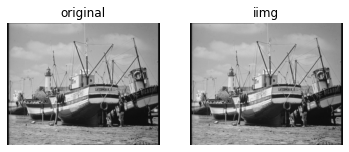

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/boat.bmp',0)

f = np.fft.fft2(img)  #把照片做傅立葉轉換
fshift = np.fft.fftshift(f) # 把頻譜 最亮的地方移動中間
ishift = np.fft.ifftshift(fshift) # 把頻譜轉回原本樣子 i=invert
iimg = np.fft.ifft2(ishift) #把已做傅立葉轉換的照片 又做反傅立葉轉換

# print(iimg)
iimg = np.abs(iimg) #取絕對值
# print(iimg)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('original'),plt.axis('off')

plt.subplot(122),plt.imshow(iimg, cmap = 'gray')
plt.title('iimg'),plt.axis('off')

plt.show()

#### 可將波轉成頻率後 過濾頻率 再反轉回波

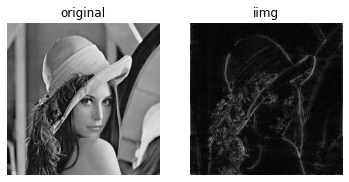

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/lena.bmp',0)

f = np.fft.fft2(img) #傅立葉轉換
fshift = np.fft.fftshift(f)
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

# 設立 高通濾波器 : 頻率高的才可以通過
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0   #把所有通過的頻率都設成0

ishift = np.fft.ifftshift(fshift) #反傅立葉轉換
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('original'),plt.axis('off')

plt.subplot(122),plt.imshow(iimg, cmap = 'gray')
plt.title('iimg'),plt.axis('off')

plt.show()

### 2.用openCV 做傅立葉轉換

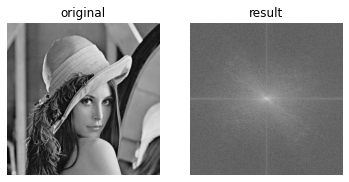

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/lena.bmp',0)

#dft= Discrete fourier transform 離散傅立葉轉換
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShift = np.fft.fftshift(dft) # 把頻譜 最亮的地方移動中間

result = 20*np.log(cv2.magnitude(dftShift[:,:,0],dftShift[:,:,1])) #計算大小

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('original'),plt.axis('off')

plt.subplot(122),plt.imshow(result, cmap = 'gray')
plt.title('result'), plt.axis('off')

plt.show()
#print(dft)

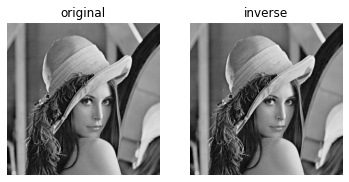

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/lena.bmp',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) #傅立葉轉換
dftShift = np.fft.fftshift(dft)
ishift = np.fft.ifftshift(dftShift)

iImg = cv2.idft(ishift) #反傅立葉轉換

iImg= cv2.magnitude(iImg[:,:,0],iImg[:,:,1]) #計算大小

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('original'), plt.axis('off')

plt.subplot(122),plt.imshow(iImg, cmap = 'gray')
plt.title('inverse'), plt.axis('off')

plt.show()

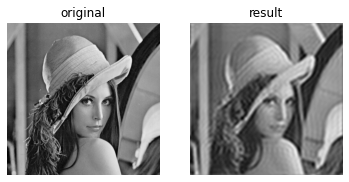

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./images/lena.bmp',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShift = np.fft.fftshift(dft)
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

mask = np.zeros((rows,cols,2),np.uint8) #两个通道，与频谱图像匹配
# 低通濾波器 : 頻率低的通過
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
fShift = dftShift*mask

ishift = np.fft.ifftshift(fShift)
iImg = cv2.idft(ishift)
iImg= cv2.magnitude(iImg[:,:,0],iImg[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('original'), plt.axis('off')

plt.subplot(122),plt.imshow(iImg, cmap = 'gray')
plt.title('result'), plt.axis('off')

plt.show()